In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

import os

In [2]:
size = (120,120)

# Pre-processing

In [3]:
testPath = 'dataset/apple_out/test/'
trainPath = 'dataset/apple_out/train/'

testX = []
trainX = []

testY = []
trainY = []

fruits = os.listdir(testPath)
for fruit in fruits:
    images = os.listdir(testPath + "/" + fruit)
    for img in images:
        image = cv2.imread(testPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
        testX.append(image)
        testY.append(fruit)
        
fruits = os.listdir(trainPath)
for fruit in fruits:
    images = os.listdir(trainPath + "/" + fruit)
    for img in images:
        image = cv2.imread(trainPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
        trainX.append(image)
        trainY.append(fruit)

testX = np.array(testX)
trainX = np.array(trainX)

testY = np.array(testY)
trainY = np.array(trainY)

In [4]:
trainX.shape

(1600, 120, 120, 3)

In [5]:
trainY.shape

(1600,)

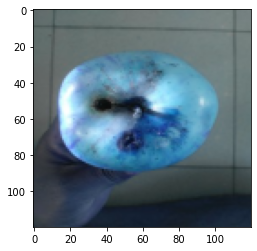

In [6]:
plt.imshow(testX[9])

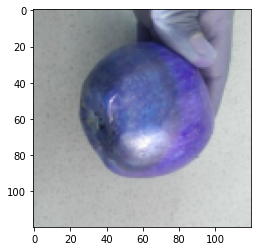

In [8]:
plt.imshow(testX[70])

### To GrayScale

In [9]:
def grayScale(image):
    t
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    return gray

In [10]:
for i in range(len(testX)):
    testX[i] = grayScale(testX[i])

In [11]:
for i in range(len(trainX)):
    trainX[i] = grayScale(trainX[i])

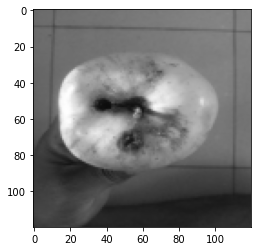

In [12]:
plt.imshow(testX[9])

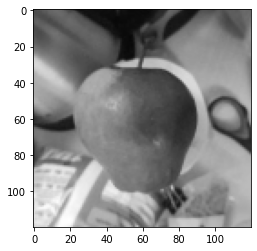

In [20]:
plt.imshow(testX[300])

In [21]:
testY[300]

'Apple_Good'

### Proccessing the image

In [22]:
# convert from integers to floats and normalize to range 0-1
norm_trainX = trainX.astype('float32')/255.0
norm_testX = testX.astype('float32')/255.0

In [23]:
norm_testX.shape

(400, 120, 120, 3)

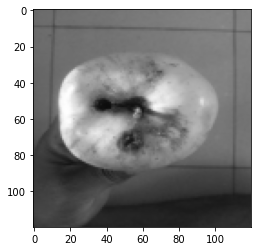

In [24]:
plt.imshow(testX[9])

In [25]:
# one hot encode target values
classes = dict()
i = 0

for index in range(len(testY)):
    if testY[index] not in classes.keys():
        classes[testY[index]] = i
        i+=1
    testY[index] = classes[testY[index]]
    
for index in range(len(trainY)):
    trainY[index] = classes[trainY[index]]

trainY = to_categorical(trainY)
testY = to_categorical(testY)

# CNN Model

In [26]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size + (3,))))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size + (3,))))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Flatten())

cnn.add(Dense(units=32, activation='relu')) #hidden layers

cnn.add(Dense(units=2, activation='softmax')) #output layer

# compile model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x=norm_trainX, y=trainY, epochs=10)

Epoch 1/10
50/50 [==============================] - 26s 496ms/step - loss: 0.6776 - accuracy: 0.5685
Epoch 2/10
50/50 [==============================] - 19s 375ms/step - loss: 0.5370 - accuracy: 0.7751
Epoch 3/10
50/50 [==============================] - 19s 373ms/step - loss: 0.4375 - accuracy: 0.8725
Epoch 4/10
50/50 [==============================] - 19s 370ms/step - loss: 0.3494 - accuracy: 0.9375
Epoch 5/10
50/50 [==============================] - 18s 366ms/step - loss: 0.3088 - accuracy: 0.9692
Epoch 6/10
50/50 [==============================] - 19s 376ms/step - loss: 0.2810 - accuracy: 0.9664
Epoch 7/10
50/50 [==============================] - 19s 372ms/step - loss: 0.2689 - accuracy: 0.9789
Epoch 8/10
50/50 [==============================] - 19s 372ms/step - loss: 0.2379 - accuracy: 0.9791
Epoch 9/10
50/50 [==============================] - 21s 411ms/step - loss: 0.2414 - accuracy: 0.9685
Epoch 10/10
50/50 [==============================] - 18s 367ms/step - loss: 0.2075 - accura

In [27]:
cnn.save('apple_model')

INFO:tensorflow:Assets written to: apple_model\assets


In [28]:
classes

{'Apple_Bad': 0, 'Apple_Good': 1}

In [29]:
import numpy as np
from keras.preprocessing import image
print(classes)
d = dict()
for i in classes.keys():
    d[classes[i]] = i
print(d)
def testModel(path):
    #Reading the image
    test_image = cv2.imread(path)
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    print("Original Image: ")
    plt.imshow(test_image)
    plt.show()
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    print("Scaled Image: ")
    plt.imshow(test_image)
    plt.show()
    #To grayscale
    test_image = grayScale(test_image)
    print("Grayscale Image: ")
    plt.imshow(test_image)
    plt.show()
    # Normalize
    test_image = test_image.astype('float32')/255.0
    print("Normalized Image: ")
    plt.imshow(test_image)
    plt.show()
    
    prediction = cnn.predict(np.array([test_image]))
    result = np.argmax(prediction)
    print(result)
    print(d[result])

{'Apple_Bad': 0, 'Apple_Good': 1}
{0: 'Apple_Bad', 1: 'Apple_Good'}


Original Image: 


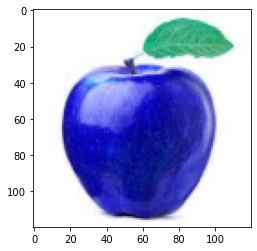

Scaled Image: 


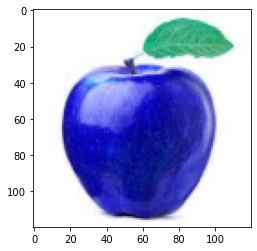

Grayscale Image: 


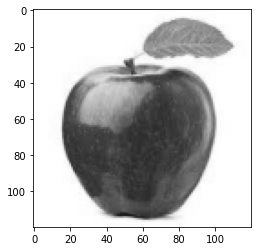

Normalized Image: 


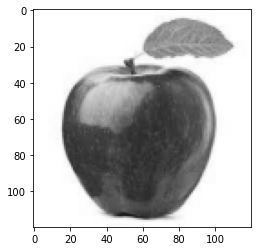

1
Apple_Good


In [30]:
testModel('dataset/single_pred/apple_or_banana1.jfif')

Original Image: 


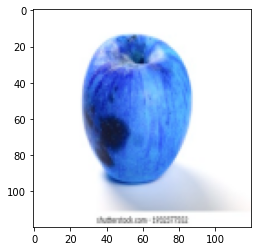

Scaled Image: 


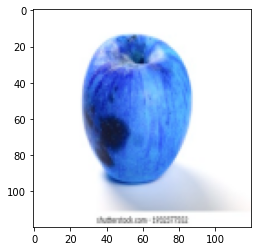

Grayscale Image: 


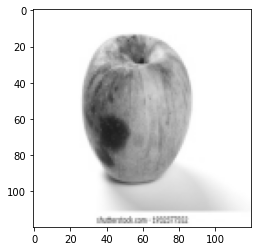

Normalized Image: 


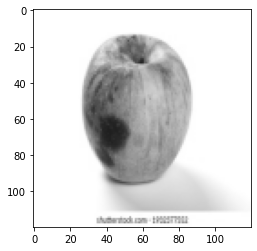

0
Apple_Bad


In [31]:
testModel('dataset/single_pred/apple_spoil1.jpg')

Original Image: 


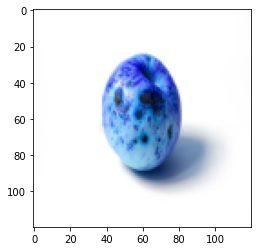

Scaled Image: 


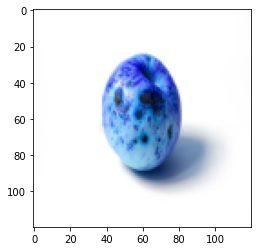

Grayscale Image: 


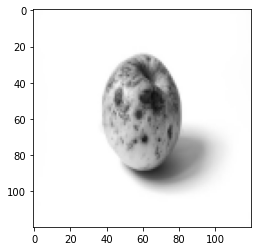

Normalized Image: 


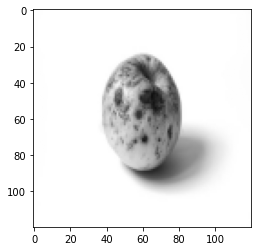

0
Apple_Bad


In [32]:
testModel('dataset/single_pred/apple_spoil2.jpg')

Original Image: 


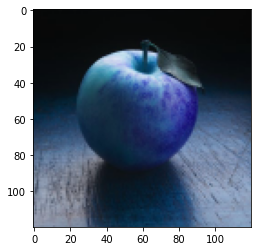

Scaled Image: 


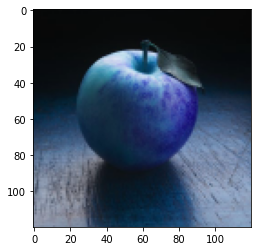

Grayscale Image: 


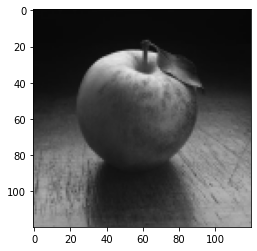

Normalized Image: 


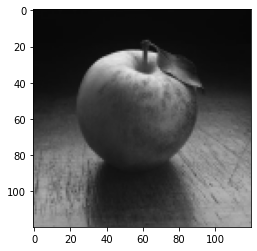

1
Apple_Good


In [33]:
testModel('dataset/single_pred/apple_good1.jpg')

Original Image: 


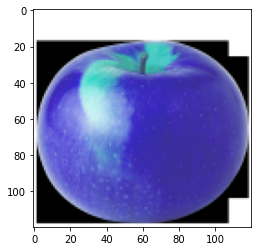

Scaled Image: 


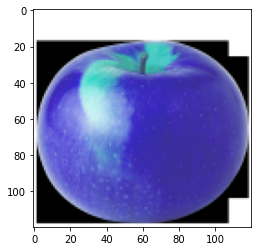

Grayscale Image: 


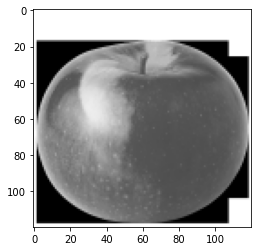

Normalized Image: 


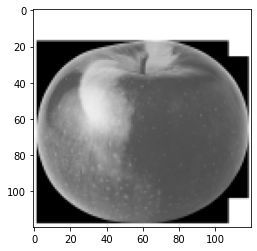

1
Apple_Good


In [35]:
testModel('dataset/single_pred/apple_good2.png')

In [36]:
val_loss, val_acc = cnn.evaluate(norm_testX, testY)

13/13 [==============================] - 2s 140ms/step - loss: 0.2379 - accuracy: 0.9475
